Run Important Libraries

In [ ]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten, BatchNormalization,Dropout

Import Dataset from Kaggle

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("salader/dogs-vs-cats")

print("Path to dataset files:", path)

100%|██████████| 1.06G/1.06G [00:48<00:00, 23.4MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/salader/dogs-vs-cats/versions/1


In [ ]:
path

'/root/.cache/kagglehub/datasets/salader/dogs-vs-cats/versions/1'

Copy the Dataset into colab notebook

In [ ]:
import shutil

# Original path (from the output you shared)
source_path = "/root/.cache/kagglehub/datasets/salader/dogs-vs-cats/versions/1"

# Destination path (make it visible)
destination_path = "/content/dogs-vs-cats"

# Copy the dataset to a visible folder
shutil.copytree(source_path, destination_path)

print(f"Dataset copied to: {destination_path}")

Dataset copied to: /content/dogs-vs-cats


In [ ]:
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/dogs-vs-cats/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size=(256,256)
)

val_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/dogs-vs-cats/test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


Normalize images


In [ ]:
def process(image, label):  # Corrected parameter name
    # Normalize the image by dividing pixel values by 255 and converting to float32
    image = tf.cast(image / 255.0, tf.float32)
    return image, label

# Apply the normalization function to the datasets
train_ds = train_ds.map(process)
val_ds = val_ds.map(process)

In [ ]:
model = Sequential()
model.add(Conv2D(32,kernel_size = (3,3),padding='valid', activation = 'relu',input_shape = (256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size = (3,3),padding='valid', activation = 'relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size = (3,3),padding='valid', activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))

model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 254, 254, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 125, 125, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 60, 60, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 115200)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      14,745,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,848,193 (56.64 MB)

 Trainable params: 14,847,745 (56.64 MB)

 Non-trainable params: 448 (1.75 KB)

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy', metrics= ['accuracy'])

#Training the model

In [ ]:
history = model.fit(train_ds,epochs=10,validation_data=val_ds)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 67s 86ms/step - accuracy: 0.5704 - loss: 2.2006 - val_accuracy: 0.6862 - val_loss: 0.5888
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 72s 86ms/step - accuracy: 0.6812 - loss: 0.6038 - val_accuracy: 0.7310 - val_loss: 0.5306
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 83s 87ms/step - accuracy: 0.7455 - loss: 0.5167 - val_accuracy: 0.7242 - val_loss: 0.5254
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 52s 83ms/step - accuracy: 0.7964 - loss: 0.4483 - val_accuracy: 0.7680 - val_loss: 0.4758
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 54s 86ms/step - accuracy: 0.8330 - loss: 0.3724 - val_accuracy: 0.7970 - val_loss: 0.4730
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 83s 88ms/step - accuracy: 0.8761 - loss: 0.2974 - val_accuracy: 0.7652 - val_loss: 0.5824
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 81s 86ms/step - accuracy: 0.9080 - loss: 0.2272 - val_accuracy: 0.8056 - val_loss: 0.5446
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 54s 87ms/step - accuracy: 0.9407 - loss: 0.1556 - 

In [ ]:
history

In [ ]:
import matplotlib.pyplot as plt

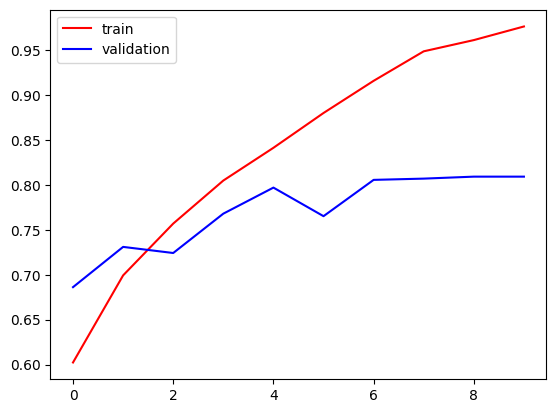

In [ ]:
plt.plot(history.history['accuracy'],color='red', label= 'train')
plt.plot(history.history['val_accuracy'],color='blue', label= 'validation')
plt.legend()
plt.show()


In [ ]:
import cv2

Testing the trained model by uploaing the image

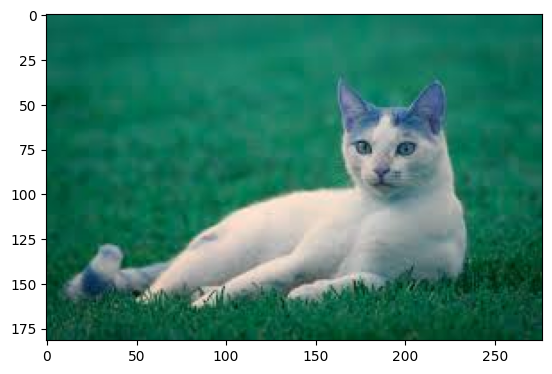

In [ ]:
test_img = cv2.imread('/content/cat1.jpeg')

plt.imshow(test_img)

In [ ]:
test_img = cv2.resize(test_img,(256,256))

In [ ]:
test_input = test_img.reshape((1,256,256,3))

In [ ]:
model.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


array([[0.]], dtype=float32)